In [131]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from cartopy.feature import NaturalEarthFeature
import cartopy.crs as ccrs
import cartopy

data = Dataset('data/Land_and_Ocean_LatLong1.nc', mode='r')

In [26]:
%config InlineBackend.figure_format = 'retina'

In [66]:
lats = data.variables['latitude'][:]
longs = data.variables['longitude'][:]
time = data.variables['time'][:]
temp = data.variables['temperature'][:]

C:\Users\Derevirn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  after removing the cwd from sys.path.
C:\Users\Derevirn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  after removing the cwd from sys.path.


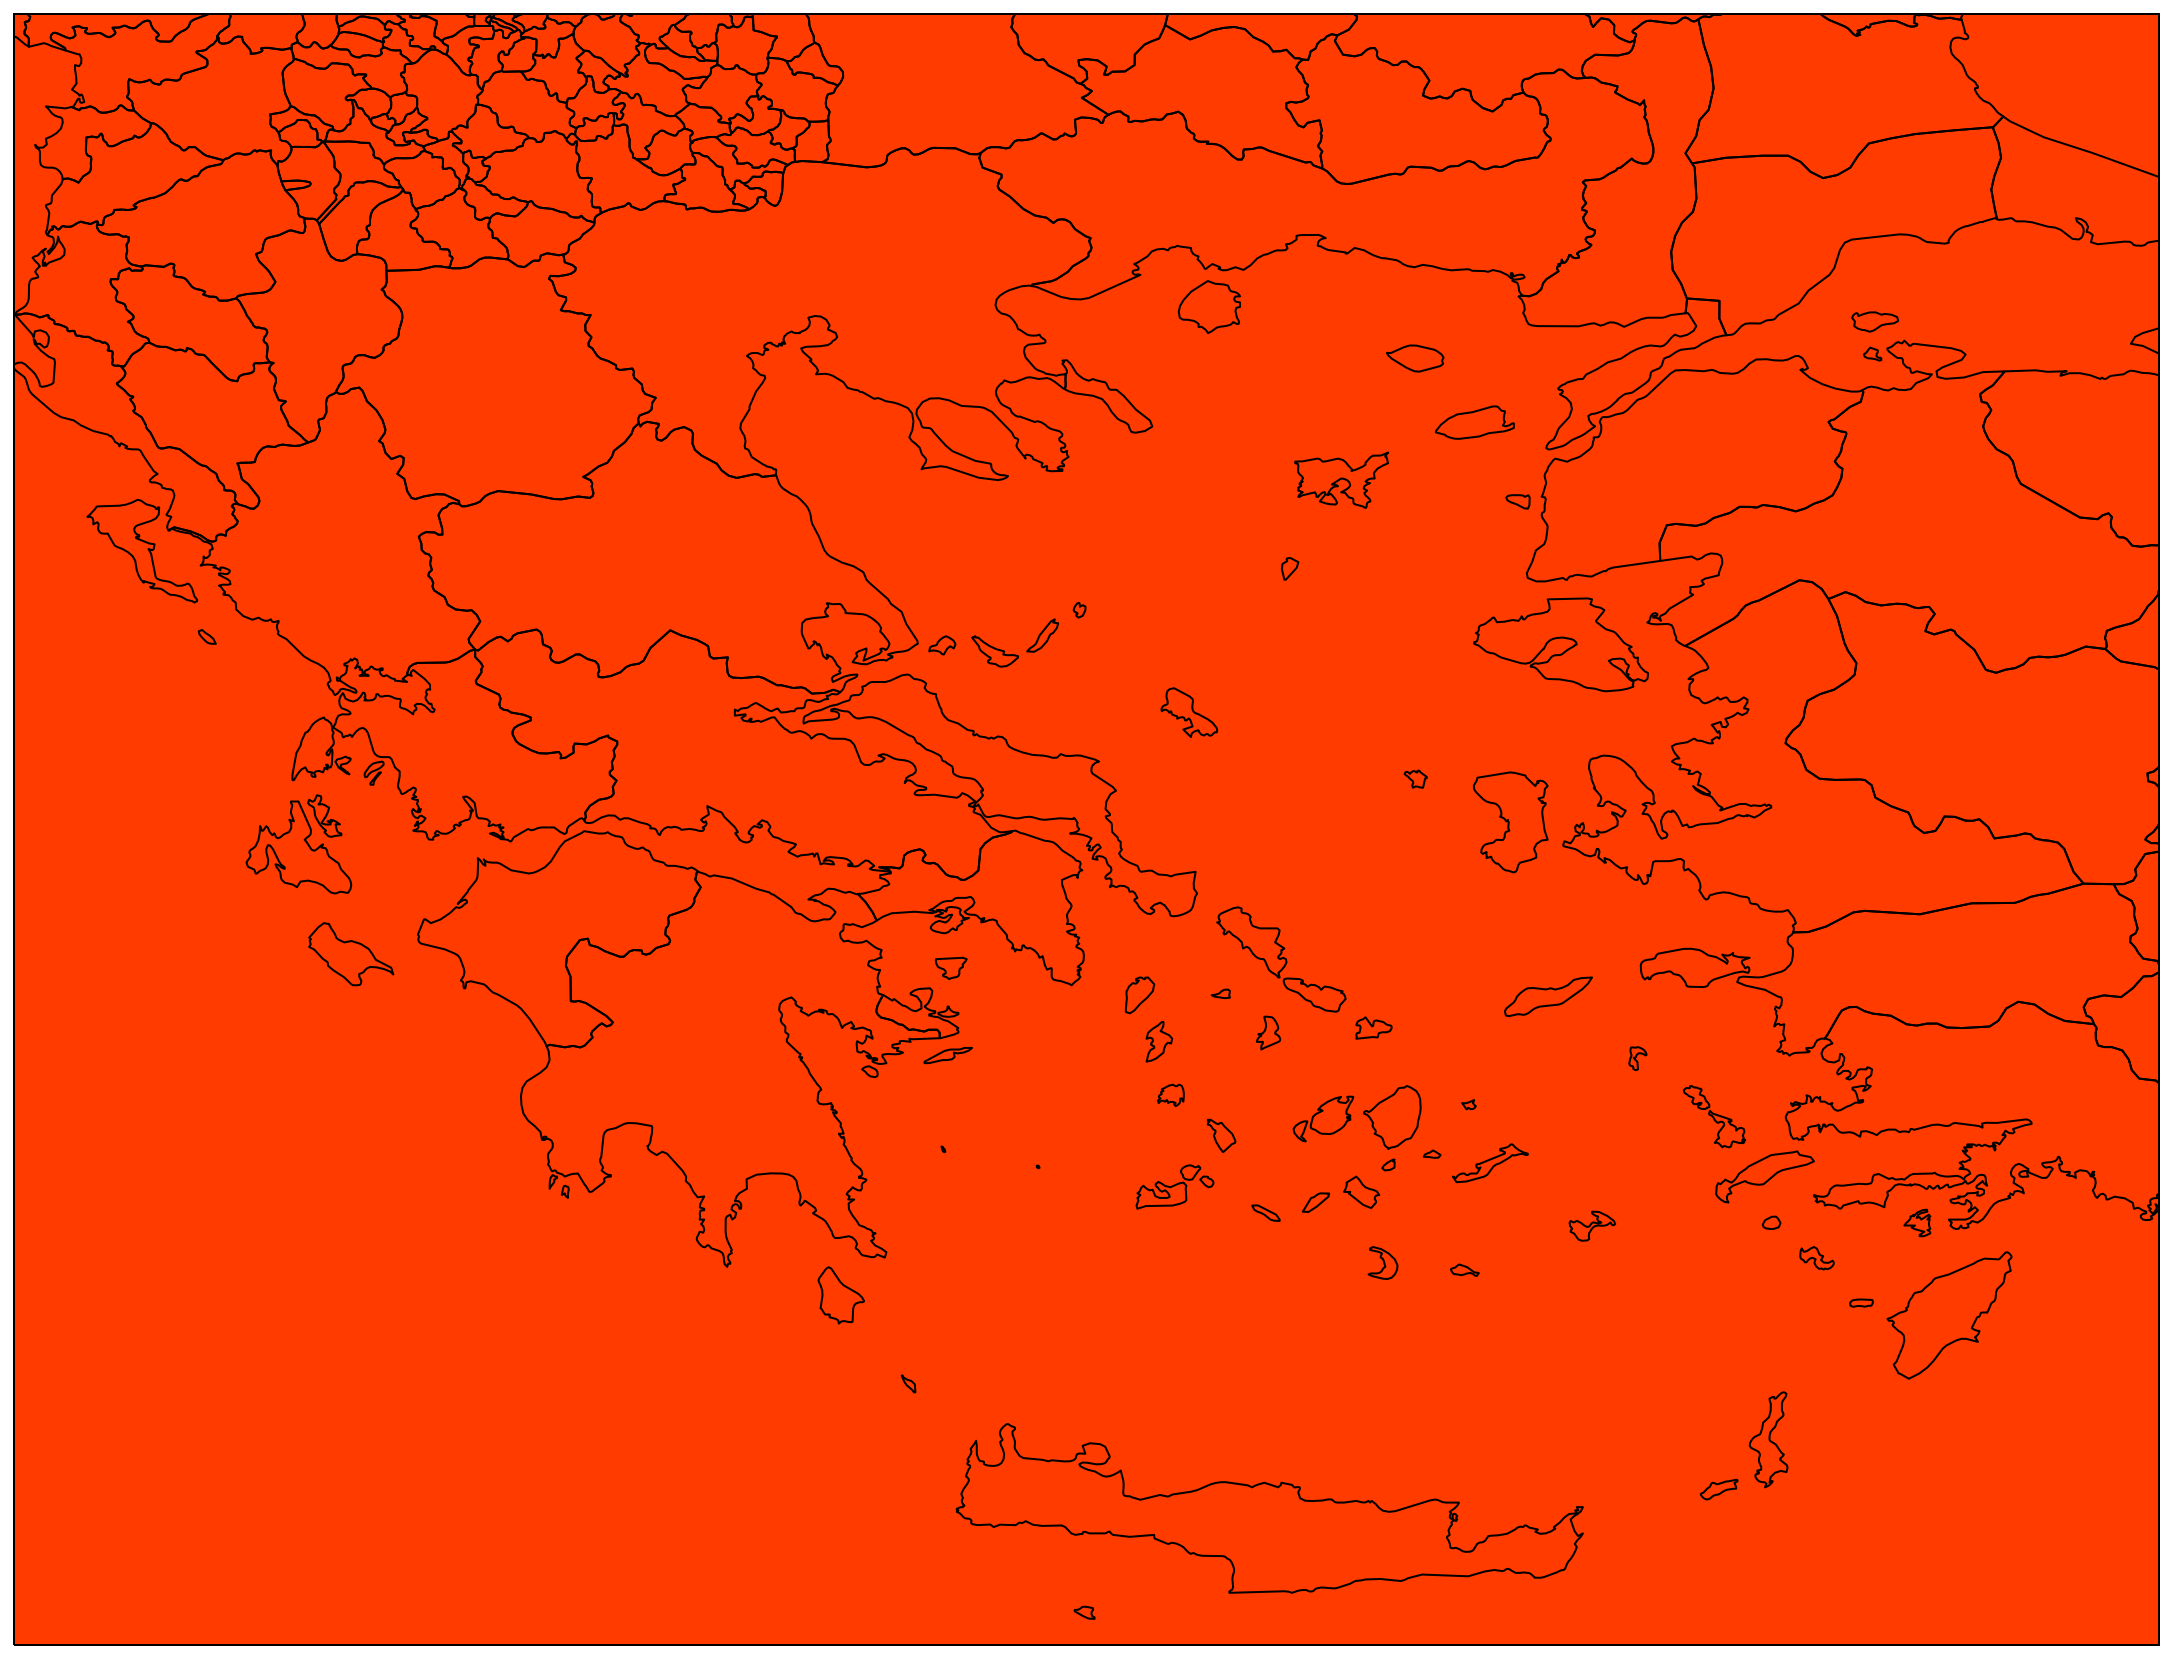

In [192]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(projection=ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_1_states_provinces', '10m'),
               facecolor='none', edgecolor='black')
ax.set_extent([19.3, 28.9, 34.7, 42])
plt.contourf(longs, lats, temp[-1], cmap='jet', vmin=-9, vmax=4,
             transform=ccrs.PlateCarree())
plt.show()   


In [186]:
for i in range(2000, 2010):
    fig = plt.figure(figsize=(25,15))
    ax = fig.add_subplot(projection=ccrs.PlateCarree())
    ax.add_feature(NaturalEarthFeature('cultural', 'admin_1_states_provinces', '10m'),
               facecolor='none', edgecolor='black')
    ax.set_extent([19.3, 28.9, 34.7, 42])
    plt.contourf(longs, lats, temp[i], cmap='jet', vmin=-10, vmax=4,
             transform=ccrs.PlateCarree())
    plt.savefig('temp'+str(i)+'.png')
    plt.close(fig)

